# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 75.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

DataFrame = pd.DataFrame({})

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
906,0,27.0,48100.0,0,0
3500,1,26.0,23700.0,0,0
1805,1,45.0,35700.0,1,1
2184,0,23.0,28400.0,1,0
4241,1,24.0,35300.0,1,0
1909,1,27.0,29200.0,2,0
2132,0,22.0,22900.0,3,0
3735,0,21.0,52300.0,1,0
3771,1,26.0,61500.0,2,0
2376,0,31.0,28300.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


A traves de los siguientes bloques de codigo podemos ver si es posible hacer el cambio de tipo de datos en la columna `"age"` sin perder informacion:

In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial
# escribe tu conversión aquí si lo deseas:

if np.array_equal(df['age'], df['age'].astype('int')):
    
    df['age'] = df['age'].astype('int')
    print("La conversion ES posible sin perder informacion.")
    
else:
    print("La conversion NO ES posible sin perder informacion.")

La conversion ES posible sin perder informacion.


In [8]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Podemos ver que los datos de la columna `"age"` se cambiaron de forma correcta a tipo `int64`.

Ahora podemos concentrarnos en las cualidades descriptivas de nuestro dataset "df".

In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?
df.describe(include='all')

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<AxesSubplot:>

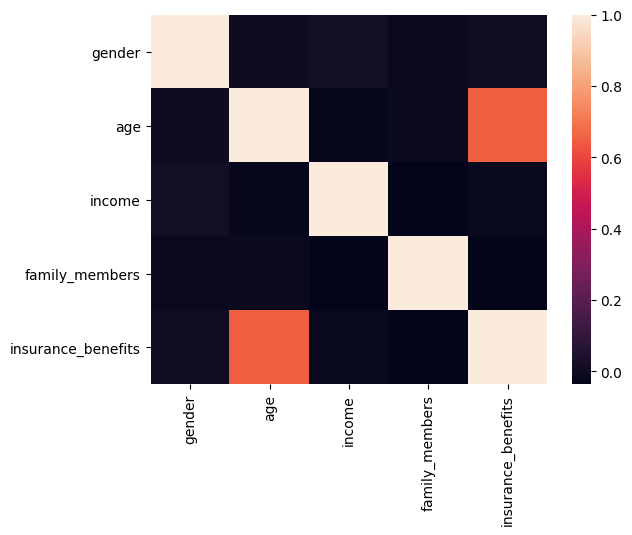

In [10]:
sns.heatmap(df.corr())

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

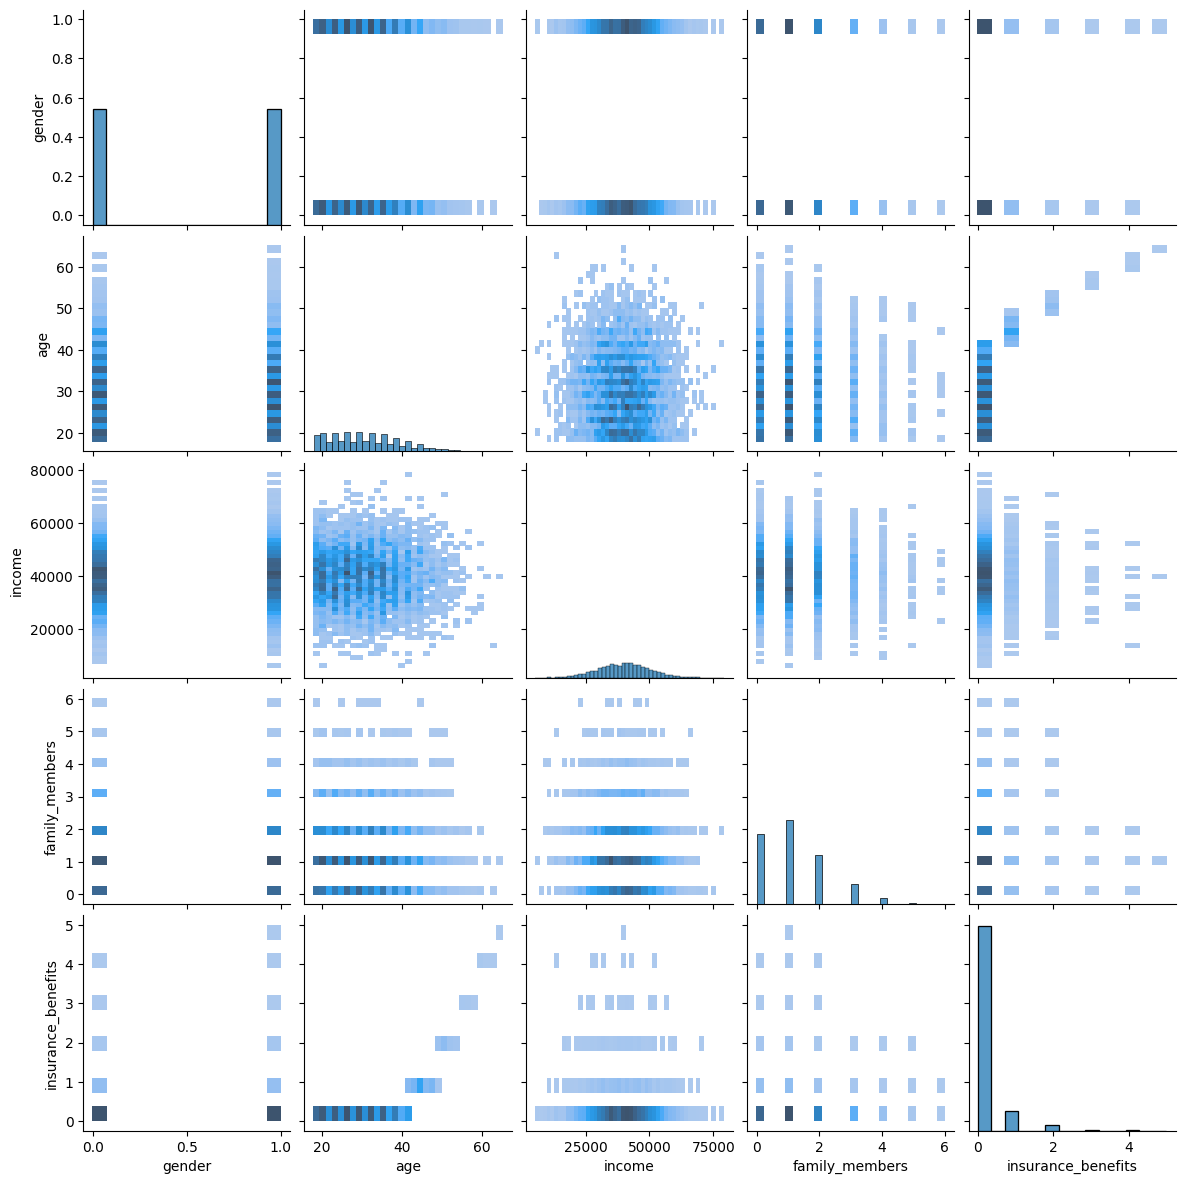

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

### Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df:DataFrame, n:int, metric:str='euclidean', k:int=5) -> DataFrame:
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param metric: nombre de la métrica de distancia    
    """

    nbrs = sklearn.neighbors.NearestNeighbors(metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k+1, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res.iloc[1:, :]

Escalar datos.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
116,1.0,0.430769,0.487342,0.000000,0
4437,0.0,0.292308,0.551899,0.166667,0
2683,0.0,0.323077,0.739241,0.166667,0
2068,0.0,0.584615,0.559494,0.500000,0
657,1.0,0.569231,0.674684,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [16]:
get_knn(df, 1000, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
3826,1,42,42600.0,1,1,1.0
347,0,39,42600.0,1,0,3.0
495,1,42,42600.0,4,0,4.0
1713,1,35,42600.0,0,0,7.0
2552,0,46,42600.0,3,1,8.0


In [17]:
get_knn(df_scaled, 1000, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
2775,1.0,0.630769,0.536709,0.166667,0,0.002532
479,1.0,0.630769,0.546835,0.166667,0,0.007595
3144,1.0,0.630769,0.550633,0.166667,0,0.011392
3826,1.0,0.646154,0.539241,0.166667,1,0.015385
3301,1.0,0.615385,0.545570,0.166667,0,0.021714


In [18]:
get_knn(df, 1000, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
3826,1,42,42600.0,1,1,1.000000
347,0,39,42600.0,1,0,2.236068
495,1,42,42600.0,4,0,3.162278
2552,0,46,42600.0,3,1,5.477226
1713,1,35,42600.0,0,0,6.082763


In [19]:
get_knn(df_scaled, 1000, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
2775,1.0,0.630769,0.536709,0.166667,0,0.002532
479,1.0,0.630769,0.546835,0.166667,0,0.007595
3144,1.0,0.630769,0.550633,0.166667,0,0.011392
3826,1.0,0.646154,0.539241,0.166667,1,0.015385
3301,1.0,0.615385,0.545570,0.166667,0,0.016636


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Si afecta. Los resultados varian drasticamente dependiendo si los datos han sido escalados o no y son pocas las filas que coinciden para ambos casos del algoritmo y para ambos metodos "euclidean" y "manhattan".

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Para un mismo cliente y cantidad de vecinos cercanos "k", los resultados entre los datos escalados y los no escalados varia considerablemente entre si. Para un numero de vecino k=5 solo un resultado es compartido entre ambos conjuntos de datos.

### Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [20]:
# сalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0) * 1
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0) * 1

In [21]:
# comprueba el desequilibrio de clases con value_counts()

# <tu código aquí>
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [22]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm2 = sklearn.metrics.ConfusionMatrixDisplay(cm)
    print('Matriz de confusión')
    cm2.plot()
    plt.show()
    
    return f1_score

In [23]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

La probabilidad: 0.00
F1: 0.00
Matriz de confusión


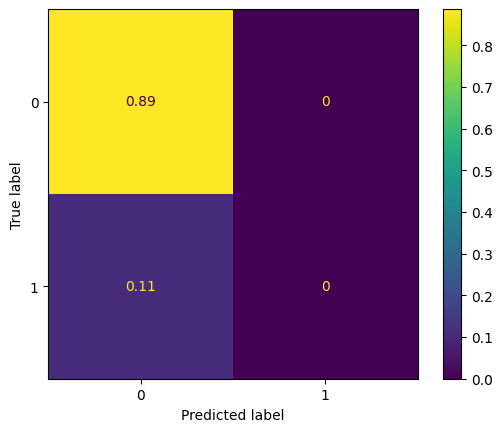


La probabilidad: 0.11
F1: 0.12
Matriz de confusión


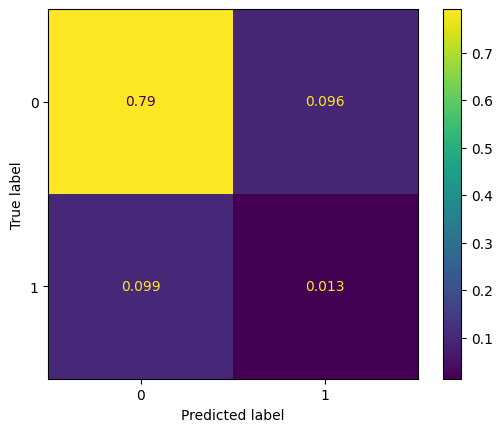


La probabilidad: 0.50
F1: 0.20
Matriz de confusión


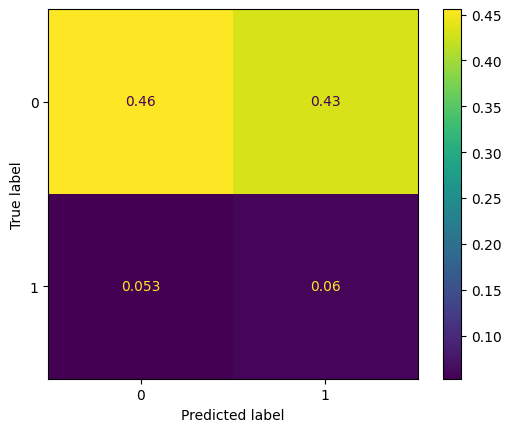


La probabilidad: 1.00
F1: 0.20
Matriz de confusión


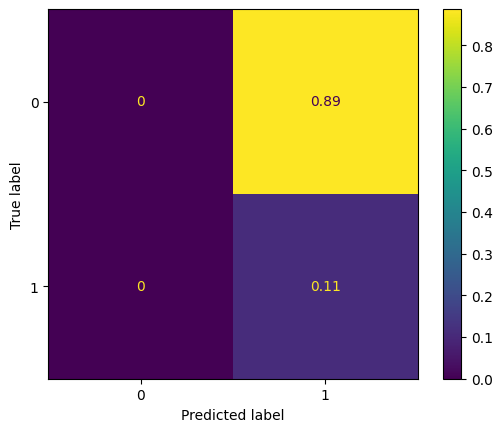

In [24]:
list1 = []
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df['insurance_benefits_received'])) 
        
    f1 = eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    list1.append(f1)
    
    print()

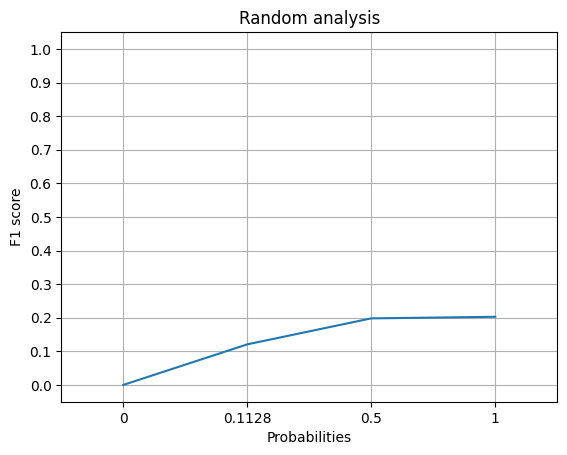

In [25]:
# Linear plot for our random model with its 4 possible "P" probabilities
plt.plot(pd.Series(list1, index=range(1, 5, 1)))
plt.xlabel("Probabilities")
plt.ylabel("F1 score")
plt.title("Random analysis")
plt.xlim(0.5, 4.5)
plt.ylim(-0.05, 1.05)
plt.xticks(list(range(1,5,1)), [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1])
plt.yticks(list(np.round(np.arange(0,1.1,0.1), 1)), np.round(np.arange(0,1.1,0.1), 1))
plt.grid(True)
plt.show()

Los valores F1 para las 4 probabilidades $P$ resultan ser muy bajos, por lo que se puede llegar a pensar que un modelo aleatorio no seria la mejor opcion para nuestra aplicacion.

Podemos calcular los nuevos valores F1 para un modelo de calsificacion entrenado de KNN para nuestro dataset como en el caso de la funcion "knnClassifier".

In [26]:
def knnClassifier(df):
    
    distances_vals = pd.DataFrame({}, index=range(1, 11, 1))
    X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['insurance_benefits_received'], 
                                                        train_size=0.7, test_size=0.3, random_state=0)
    
    print("--------------------------------------------------------------------------------------------------------")
    for metric in ['euclidean', 'manhattan']:
        
        print(f"{metric.capitalize()} metric:\n")
        
        distances = []
        for k in range(1, 11, 1):
            
            print(f"K = {k}")
            knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric=metric).fit(X_train, y_train)
            preds = knn.predict(X_test)

            f1_score = eval_classifier(y_test, preds)
            distances.append(f1_score)
            print()
        
        distances_vals[metric] = distances
        
        print("--------------------------------------------------------------------------------------------------------")
    return distances_vals

Matrices de confusion para ambas metricas "Euclidean" y "Manhattan" para una cantidad de vecinos cercanos $k = {1...10}$ con el dataset sin escalar.

--------------------------------------------------------------------------------------------------------
Euclidean metric:

K = 1
F1: 0.61
Matriz de confusión


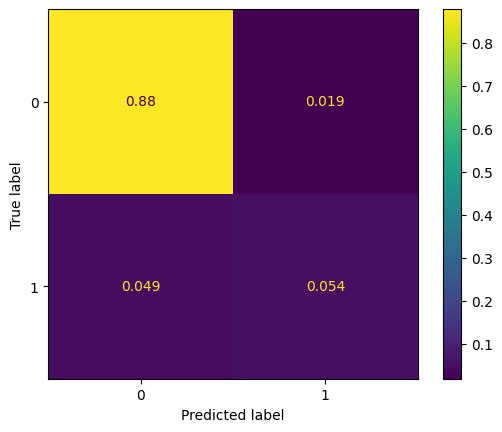


K = 2
F1: 0.44
Matriz de confusión


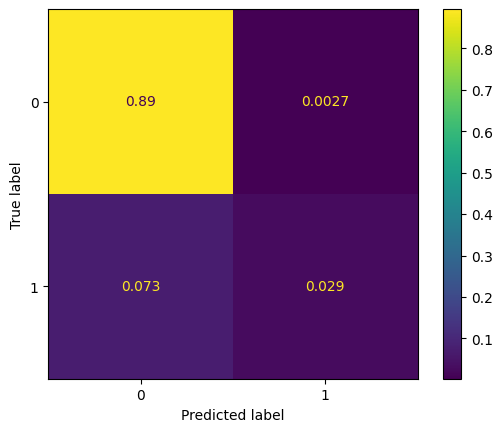


K = 3
F1: 0.44
Matriz de confusión


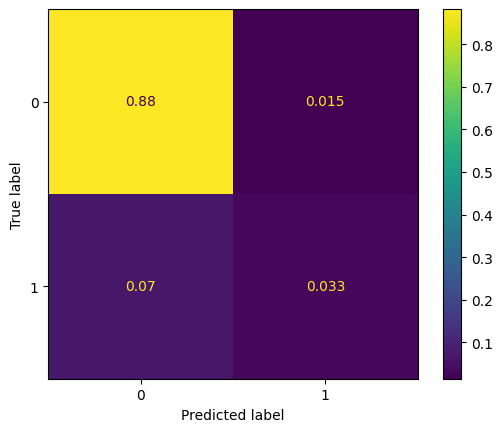


K = 4
F1: 0.19
Matriz de confusión


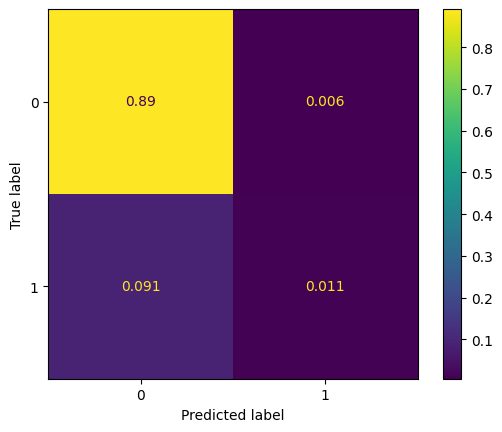


K = 5
F1: 0.20
Matriz de confusión


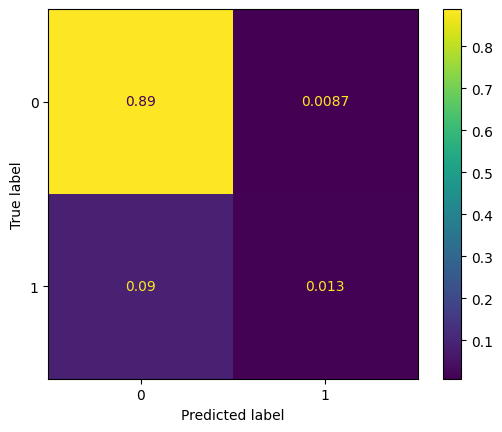


K = 6
F1: 0.09
Matriz de confusión


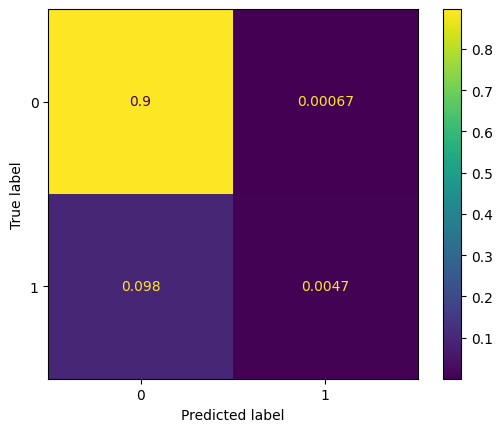


K = 7
F1: 0.16
Matriz de confusión


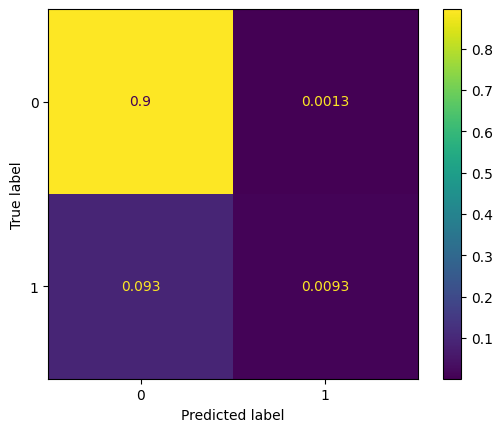


K = 8
F1: 0.10
Matriz de confusión


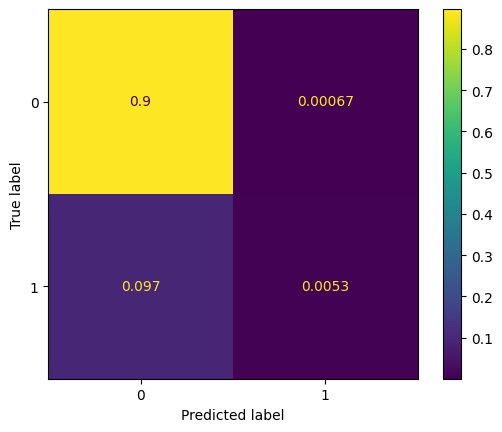


K = 9
F1: 0.11
Matriz de confusión


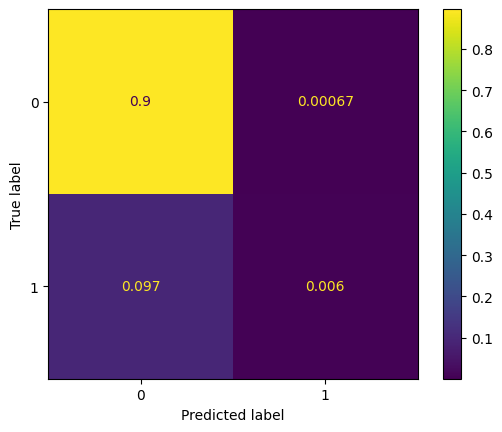


K = 10
F1: 0.00
Matriz de confusión


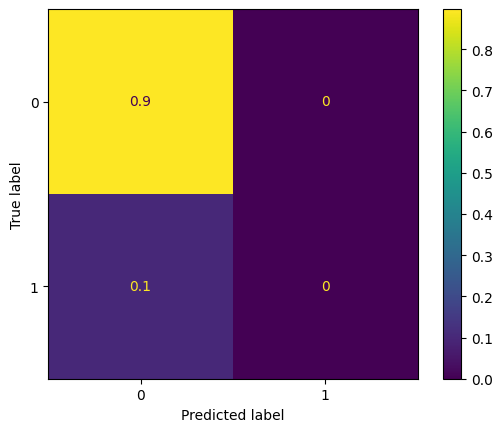


--------------------------------------------------------------------------------------------------------
Manhattan metric:

K = 1
F1: 0.60
Matriz de confusión


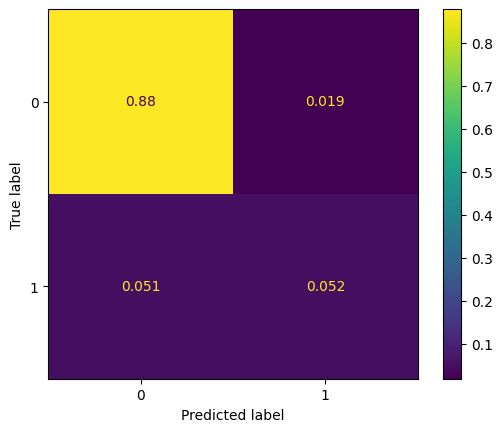


K = 2
F1: 0.43
Matriz de confusión


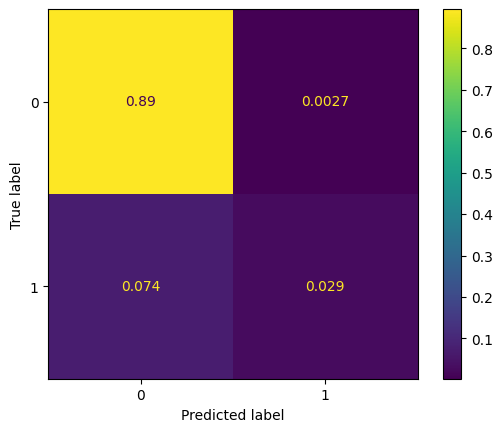


K = 3
F1: 0.44
Matriz de confusión


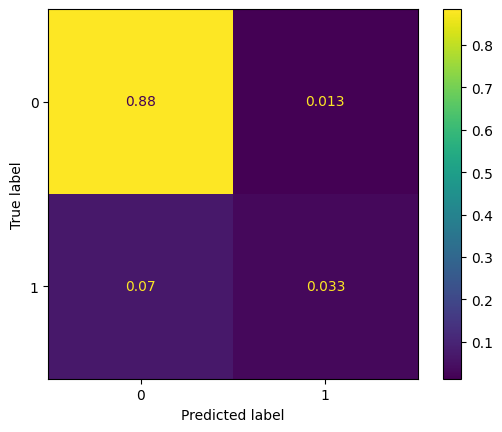


K = 4
F1: 0.20
Matriz de confusión


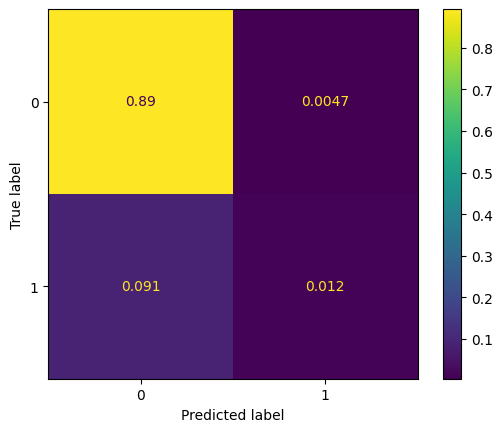


K = 5
F1: 0.22
Matriz de confusión


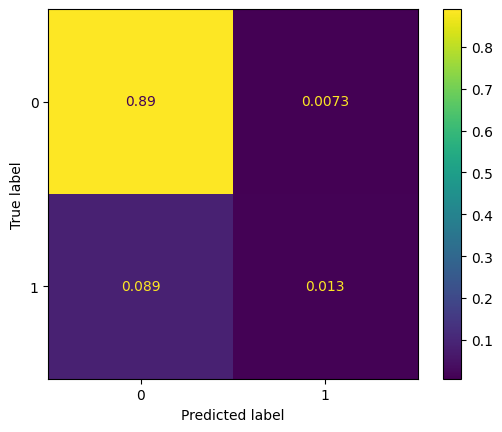


K = 6
F1: 0.07
Matriz de confusión


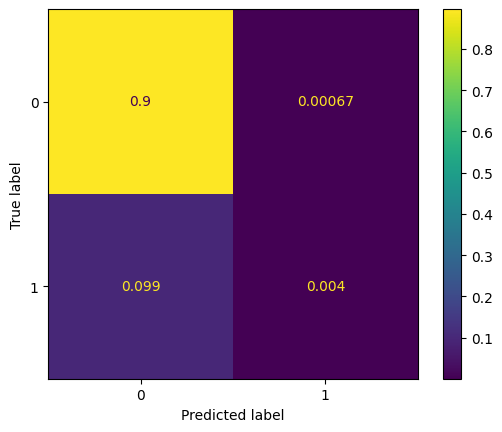


K = 7
F1: 0.16
Matriz de confusión


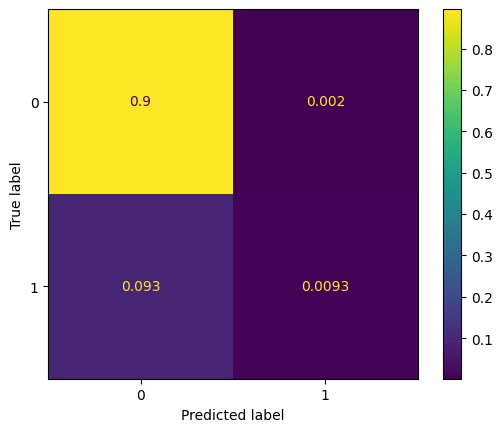


K = 8
F1: 0.10
Matriz de confusión


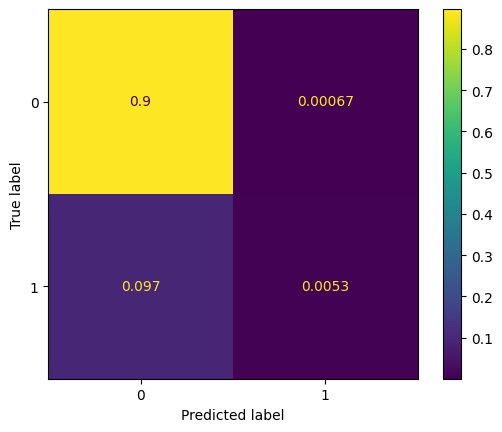


K = 9
F1: 0.12
Matriz de confusión


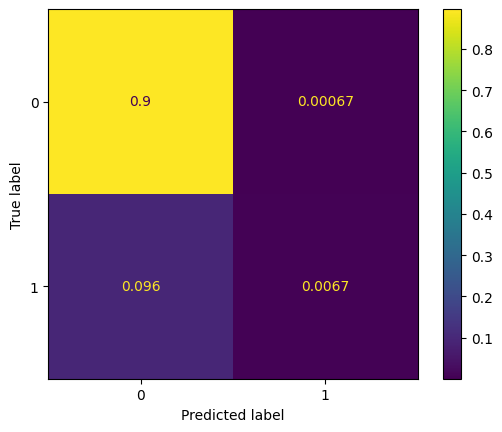


K = 10
F1: 0.00
Matriz de confusión


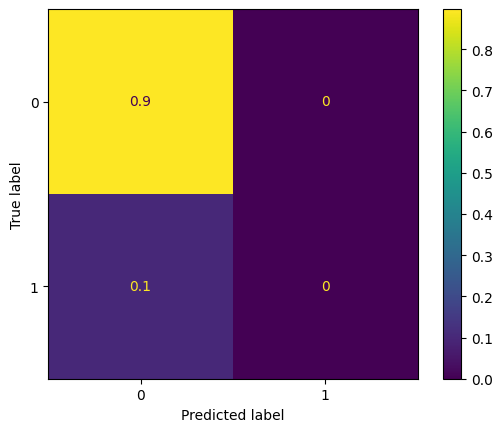


--------------------------------------------------------------------------------------------------------


In [27]:
df_vals = knnClassifier(df)

Matrices de confusion para ambas metricas "Euclidean" y "Manhattan" para una cantidad de vecinos cercanos $k = {1...10}$ con el dataset escalado.

--------------------------------------------------------------------------------------------------------
Euclidean metric:

K = 1
F1: 0.95
Matriz de confusión


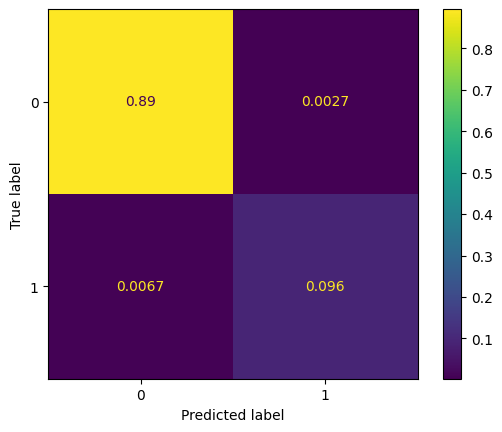


K = 2
F1: 0.92
Matriz de confusión


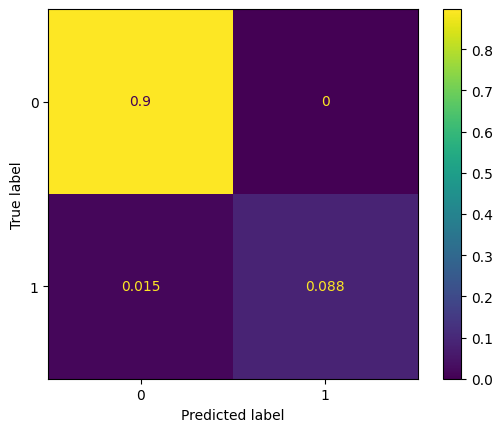


K = 3
F1: 0.94
Matriz de confusión


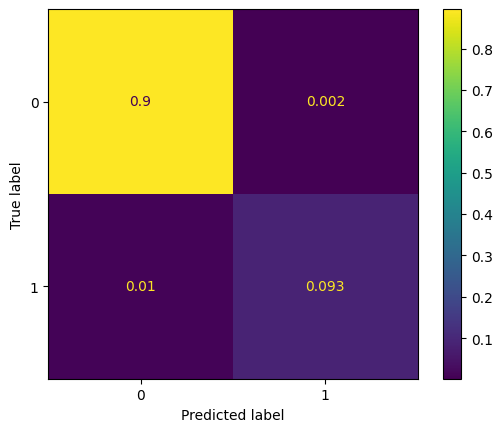


K = 4
F1: 0.89
Matriz de confusión


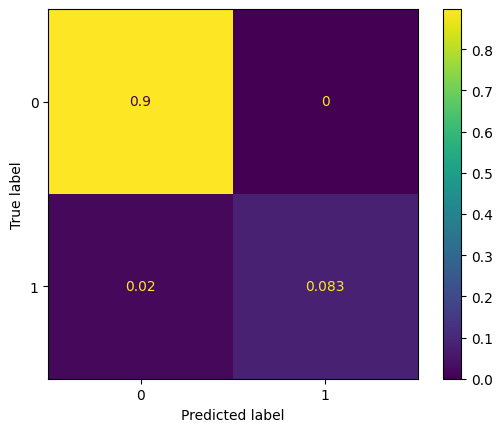


K = 5
F1: 0.91
Matriz de confusión


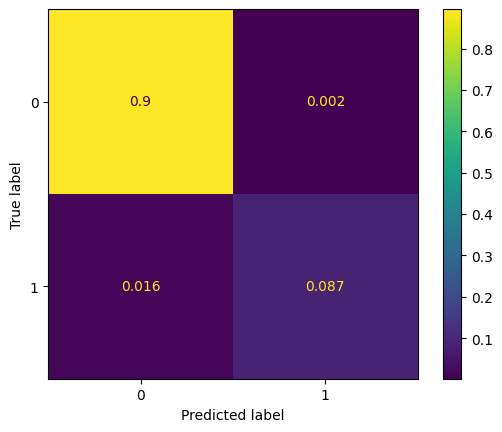


K = 6
F1: 0.89
Matriz de confusión


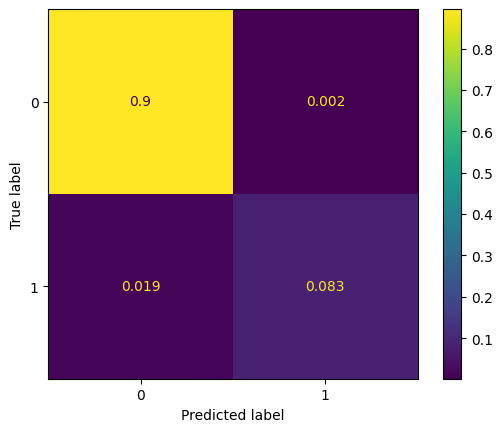


K = 7
F1: 0.91
Matriz de confusión


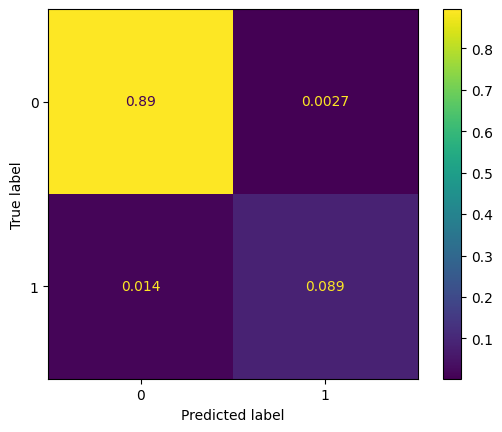


K = 8
F1: 0.89
Matriz de confusión


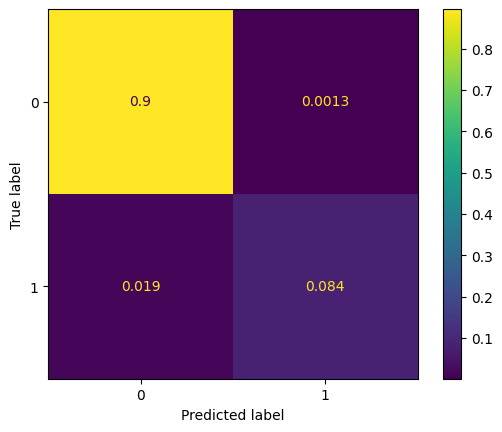


K = 9
F1: 0.91
Matriz de confusión


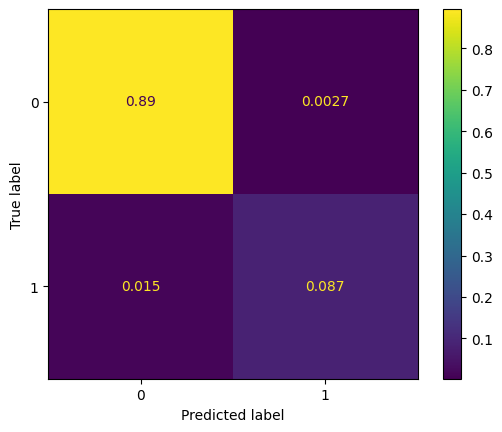


K = 10
F1: 0.90
Matriz de confusión


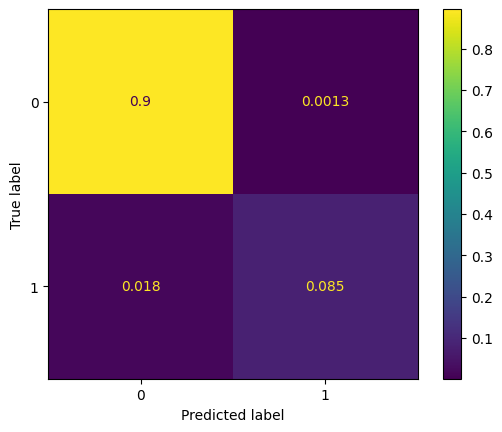


--------------------------------------------------------------------------------------------------------
Manhattan metric:

K = 1
F1: 0.95
Matriz de confusión


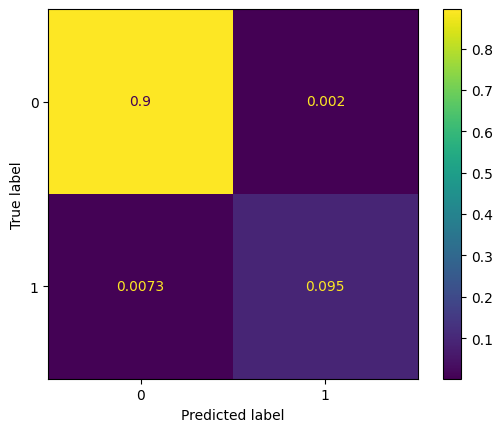


K = 2
F1: 0.92
Matriz de confusión


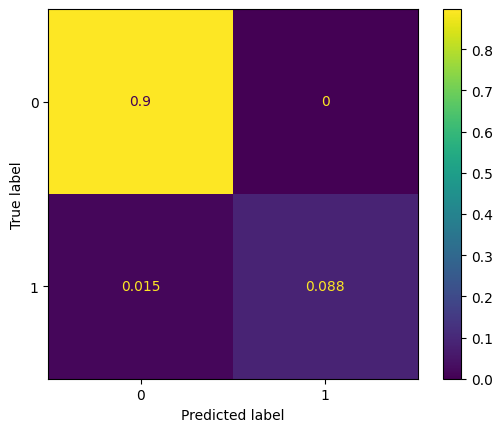


K = 3
F1: 0.94
Matriz de confusión


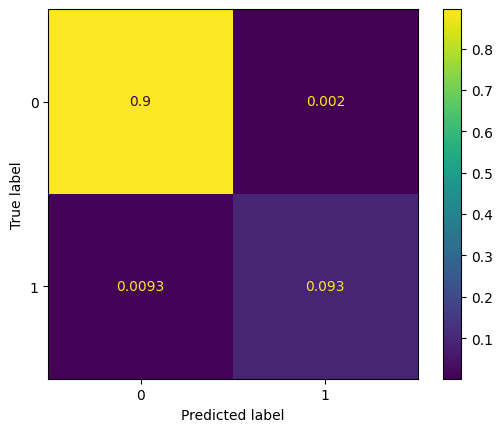


K = 4
F1: 0.91
Matriz de confusión


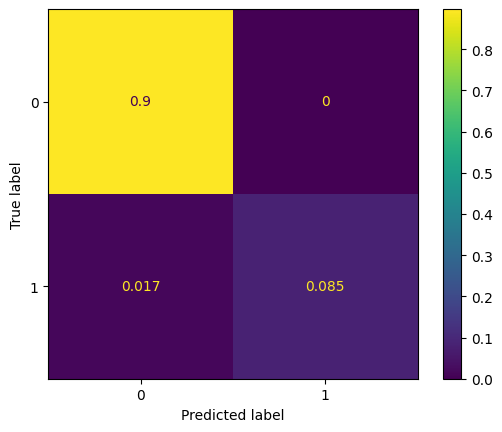


K = 5
F1: 0.92
Matriz de confusión


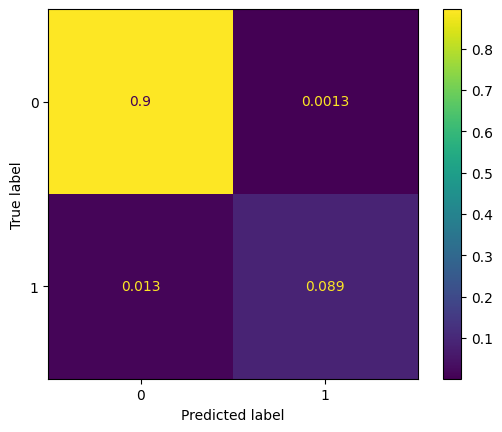


K = 6
F1: 0.89
Matriz de confusión


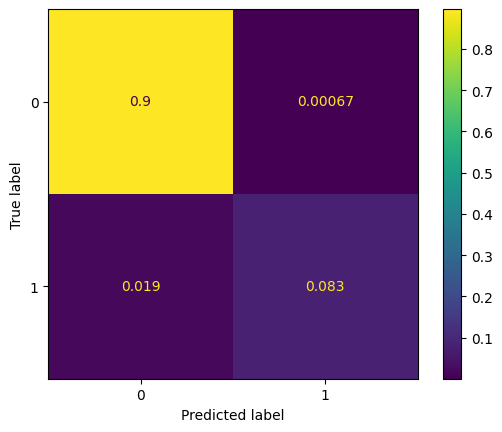


K = 7
F1: 0.92
Matriz de confusión


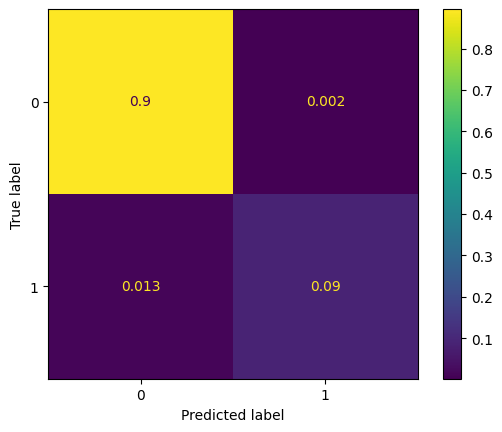


K = 8
F1: 0.91
Matriz de confusión


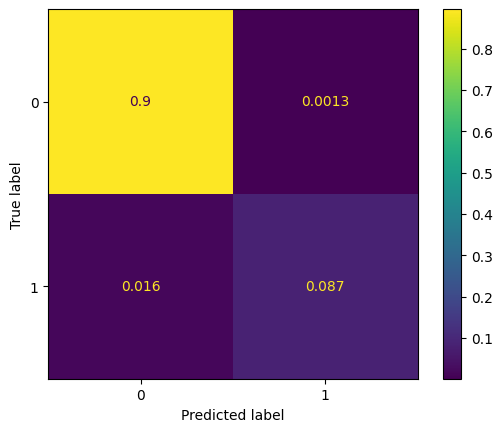


K = 9
F1: 0.92
Matriz de confusión


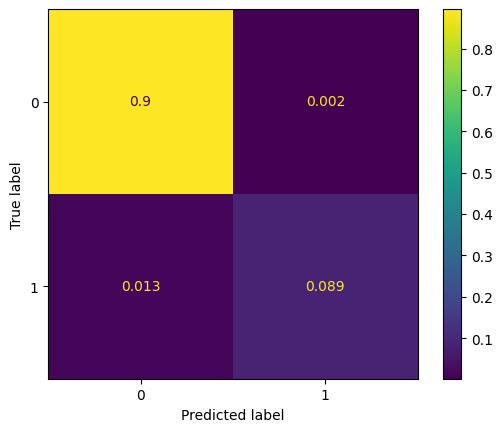


K = 10
F1: 0.91
Matriz de confusión


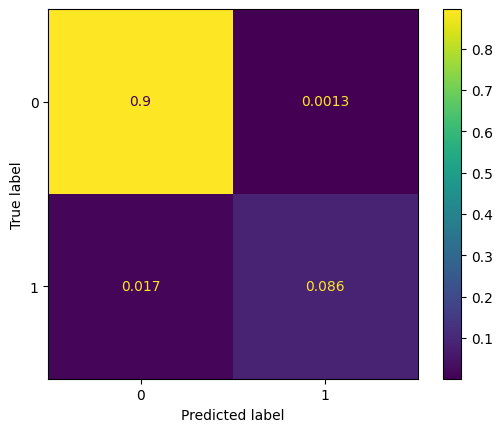


--------------------------------------------------------------------------------------------------------


In [28]:
df_scaled_vals = knnClassifier(df_scaled)

Diagrama de lineas para las distribucion de valores F1 para los datos escalados y no escalados con la metrica "Euclidean".

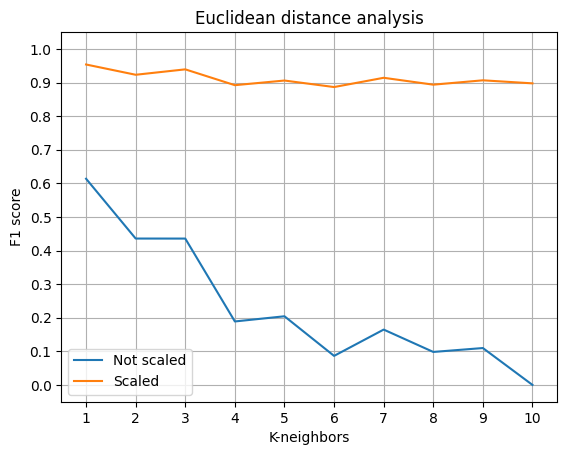

The mean F1 value for the not scaled set is 0.23370666899088516.
The mean F1 value for the scaled set is 0.9112250259536181.


In [29]:
# Plotting the F1 score values for the eucliden KNN classifier model with scaled and non-scaled features
plt.plot(df_vals['euclidean'], label='Not scaled')
plt.plot(df_scaled_vals['euclidean'], label='Scaled')
plt.xlabel("K-neighbors")
plt.ylabel("F1 score")
plt.title("Euclidean distance analysis")
plt.xlim(0.5, 10.5)
plt.ylim(-0.05, 1.05)
plt.xticks(list(range(1,11,1)), range(1,11,1))
plt.yticks(list(np.round(np.arange(0,1.1,0.1), 1)), np.round(np.arange(0,1.1,0.1), 1))
plt.grid(True)
plt.legend()
plt.show()

print(f"The mean F1 value for the not scaled set is {df_vals['euclidean'].mean()}.")
print(f"The mean F1 value for the scaled set is {df_scaled_vals['euclidean'].mean()}.")

Diagrama de lineas para las distribucion de valores F1 para los datos escalados y no escalados con la metrica "Manhattan".

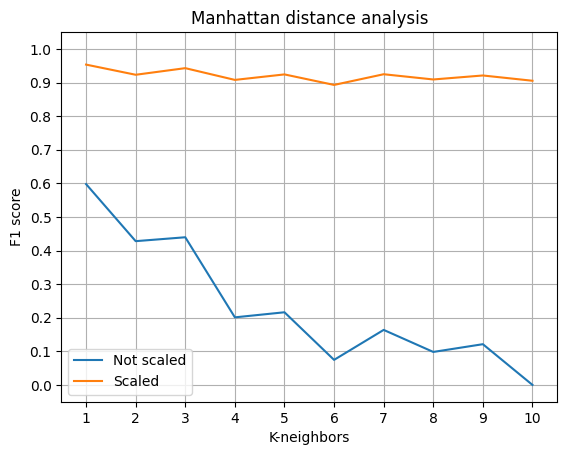

The mean F1 value for the not scaled set is 0.23400057459664803.
The mean F1 value for the scaled set is 0.9203941492047477.


In [30]:
# Plotting the F1 score values for the manhattan KNN classifier model with scaled and non-scaled features
plt.plot(df_vals['manhattan'], label='Not scaled')
plt.plot(df_scaled_vals['manhattan'], label='Scaled')
plt.xlabel("K-neighbors")
plt.ylabel("F1 score")
plt.title("Manhattan distance analysis")
plt.xlim(0.5, 10.5)
plt.ylim(-0.05, 1.05)
plt.xticks(list(range(1,11,1)), range(1,11,1))
plt.yticks(list(np.round(np.arange(0,1.1,0.1), 1)), np.round(np.arange(0,1.1,0.1), 1))
plt.grid(True)
plt.legend()
plt.show()

print(f"The mean F1 value for the not scaled set is {df_vals['manhattan'].mean()}.")
print(f"The mean F1 value for the scaled set is {df_scaled_vals['manhattan'].mean()}.")

# Conclusiones

Para los modelos KNN se observo una tendecia positiva en el aumento del valor F1 para valores $k = {1...10}$ en ambas metricas "Euclidean" y "Manhattan" usando valores escalados en lugar de valores no escalados. Para todas las instancias del modelo se tuvo valores F1 mayores para los datos escalados, por lo que se recomienda escalar los datos de caracteristicas antes de usar modelos de clasificacion KNN.

### Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [31]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Applying the linear algebra linear regression formula
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Using linear algebra predictions formula
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [32]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')
    
    r2_score_sqr = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'Squared R2: {r2_score_sqr:.2f}')

Se creo la funcion "MyLinearRegressionFunction" para encapsular en ella misma todo el proceso de division de datos, entrenamiento del modelo "MyLinearRegression", la obtecion de los valores RMSE y R2 y la graficacion del modelo linear en un mismo bloque de codigo.

In [33]:
def MyLinearRegressionFunction(df):
    
    X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
    y = df['insurance_benefits'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

    # Training the model
    lr = MyLinearRegression()

    lr.fit(X_train, y_train)
    print(lr.weights)

    # Generating predictions
    y_test_pred = lr.predict(X_test)
    eval_regressor(y_test, y_test_pred)
    
    # Plotting the model predictions and real values
    ax = sns.regplot(x=y_test, y=y_test_pred)
    ax.set(xlabel="Real values",
           ylabel="Predicted values",
           title="Linear Regression model")
    ax.set_xlim(-0.1, 4.1)
    ax.set_ylim(-0.5, 2.1)
    plt.grid()
    plt.show()

Ejecucion de la funcion para el set de datos sin escalar.

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.43
Squared R2: 0.66


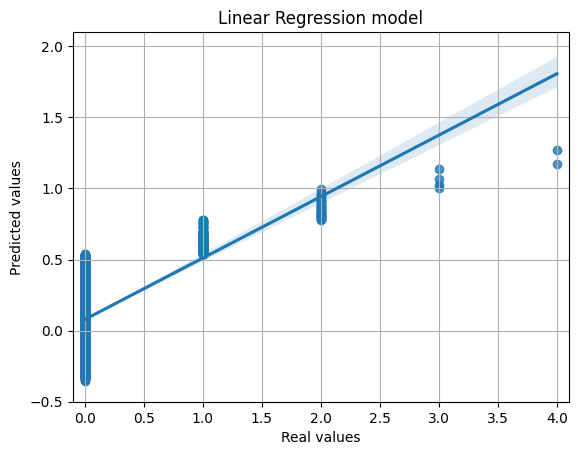

In [34]:
MyLinearRegressionFunction(df)

Ejecucion de la funcion para el set de datos escalados.

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.43
Squared R2: 0.66


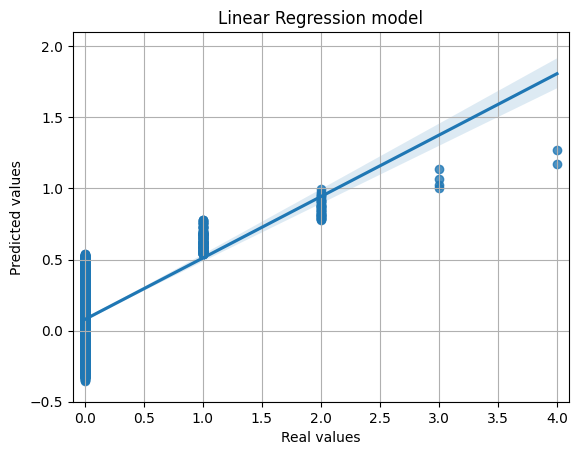

In [35]:
MyLinearRegressionFunction(df_scaled)

# Conclusiones

Para ambos conjuntos de datos los valores obtenidos en el modelo de regresion lineal fueron los mismos (a pesar de que nuestro vector de pesos si cambio), por lo que podemos deducir que el escalado de caracteristicas no afecta al modelo de regresion lineal.

### Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [36]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [37]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [38]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [39]:
# Evaluating of P-matrix is reversible
try:
    P_1 = np.linalg.inv(P)
    print("La matriz ES invertible.")
except ValueError:
    print("La matriz NO ES invertible.")

La matriz ES invertible.


**¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?**

Se vuelve complicado comprender la informacion una vez ofuscada, y a menos que se efectue un procesamiento previo no se puede deducir nad de la informacion ofuscada.

In [40]:
df_1 = pd.DataFrame(df_pn.dot(P).values, columns=personal_info_column_list)
print(df_1.sample(5, random_state=0))
df_1.describe(include='all')

           gender           age        income  family_members
398   4833.353137  17009.641291  14002.363119    34962.849247
3833  5602.714712  19711.420174  16227.248722    40523.350484
4836  5590.750945  19675.162182  16197.019177    40437.748564
4572  5564.092268  19574.353148  16114.487036    40243.748859
636   4627.994616  16285.121301  13406.041721    33476.881008


,gender,age,income,family_members
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,5117.900043,18009.167022,14825.424793,37018.035177
std,1268.305472,4458.684950,3670.806177,9174.924252
min,682.303621,2407.819558,1981.754335,4928.500334
25%,4269.527744,15021.764168,12365.912182,30879.751275
50%,5153.401776,18130.804454,14925.711344,37275.945017
75%,5974.169770,21018.835352,17303.673280,43212.065152
max,10126.899939,35622.574012,29325.996068,73247.814601


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles.

$$
X = X' \times P^{-1}
$$

In [41]:
df_rec = pd.DataFrame(df_1.dot(P_1).values, columns=personal_info_column_list)
df_rec.describe(include='all')

,gender,age,income,family_members
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03
mean,4.990000e-01,30.952800,39916.360000,1.194200e+00
std,5.000490e-01,8.440807,9900.083569,1.091387e+00
min,-1.283369e-11,18.000000,5300.000000,-5.344727e-12
25%,-4.457880e-12,24.000000,33300.000000,3.889015e-12
50%,5.082956e-13,30.000000,40200.000000,1.000000e+00
75%,1.000000e+00,37.000000,46600.000000,2.000000e+00
max,1.000000e+00,65.000000,79000.000000,6.000000e+00


In [42]:
df[personal_info_column_list].describe(include='all')

,gender,age,income,family_members
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200
std,0.500049,8.440807,9900.083569,1.091387
min,0.000000,18.000000,5300.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000
75%,1.000000,37.000000,46600.000000,2.000000
max,1.000000,65.000000,79000.000000,6.000000


Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [43]:
# Original data
df[personal_info_column_list].sample(5, random_state=12345)

,gender,age,income,family_members
3183,0,33,39000.0,4
1071,0,50,43100.0,2
2640,1,39,42100.0,0
2282,0,20,34800.0,0
1595,0,41,40000.0,4


In [44]:
# Obfuscated data
df_1.sample(5, random_state=12345)

,gender,age,income,family_members
3183,5002.114987,17600.538162,14488.014212,36170.683642
1071,5527.694166,19462.060564,16020.338658,39983.328712
2640,5398.030808,18999.736136,15641.139866,39048.159906
2282,4460.237964,15692.943086,12918.994037,32267.142898
1595,5130.982039,18058.729079,14864.901354,37103.737145


In [45]:
# Recovered data
df_rec.sample(5, random_state=12345)

,gender,age,income,family_members
3183,-3.248455e-12,33.0,39000.0,4.000000e+00
1071,-5.604084e-12,50.0,43100.0,2.000000e+00
2640,1.000000e+00,39.0,42100.0,1.952662e-12
2282,-3.584781e-12,20.0,34800.0,4.063085e-12
1595,-5.435906e-12,41.0,40000.0,4.000000e+00


**Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?**

Supongo que esto se debe a una minima perdida de la informacion entre el "encoding" que supone el ofuscamiento y la recuperacion de esta informacion a traves de un "pseudo-decoding", aunque no se esta del todo seguro. La informacion recuperada presenta datos exactamente igual a comparacion del set original excepto en las celdas con valores igual a 0. El set de datos recuperado regresa valores muy cercanos al 0, por lo que se puede inferir que se intenta recuperar el velor original de 0 pero por alguna razon no se alcanza a recuperar con total exactitud.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analiticamente_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

**¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior?**

La relacion entre $w$ y $w_P$ sera de la forma:

$$w = P^{-1}w_P$$

Lo cual significa que los valores del vector de pesos seran diferentes en una medida totalmente en funcion de la matriz $P$ utilizada en el ofuscamiento de los datos.

**¿Cuáles serían los valores predichos con $w_P$?**

Los valores predichos por el vector $w_P$ estaran representados de la siguiente forma:

$$y_P = X'w_P$$

Donde recordemos que $X'$ es nuestra matriz de caracteristicas ofuscada de la forma $X' = PX$. Estas predicciones $y_P$ estan relacionadas con las predicciones $y = Xw$ de la siguiente forma:

$$y = y_P$$

Esto debido a:

$$Xw = X'w_P$$

**¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?**

Si tenemos la certeza de que ambas predicciones seran iguales los valores de la raiz del error caudratico medio (RMSE por sus siglas en ingles) `seran los mismos para ambos conjuntos de datos` ofuscados y no ofuscados.

**Prueba analítica**

**Explicacion sobre la relacion entre $w$ y $w_P$**

Reduciendo la ecuacion $w_P$ obtenemos lo siguiente:

$$w_P = [(XP)^{T} XP]^{-1}X^{T}P^{T}y$$
$$w_P = (P^{T}X^{T}XP)^{-1}(XP)^{T}y$$
$$w_P = P^{-T}P^{-1}(X^{T}X)^{-1}P^{T}X^{T}y$$

Debido a que $P^{-T}P^{T} = I$, podemos continuar de la siguiente forma:

$$w_P = P^{-1}(X^{T}X)^{-1}X^{T}y$$

Recordemos lo siguiente $w = (X^{T}X)^{-1}X^{T}y$, y reducimos nuestra ecuacion de la siguiente forma:

$$w_P = P^{-1}w$$

Esto nos indica que la relacion entre los pesos $w$ y $w_P$ estara en funcion de la matriz de ofuscacion inversa $P^{-1}$, por lo que cualquier diferencia entre los pesos entre estos 2 vectores dependera completamente de la matriz $P$.

**Explicacion sobre la integridad de las predicciones**

Recordemos que nuestra ecuacion de predicciones sin ofuscar se expresa de la forma $y = Xw$, asi que podemos agregar el producto $PP^{-1}$ ya que no afectara el resultado de ninguno de los miembros de la ecucion por ser la matriz unitaria $I$:

$$Xw = Xw$$
$$Xw = XPP^{-1}w$$

Recordando que $P^{-1}w = w_P$ y $XP = X'$ obtenemos lo siguiente:

$$Xw = X'w_P$$

Expresandolo de otra forma, obtenemos la ecuacion en funcion de los terminos de las predicciones:

$$y = y_P$$

Esto indica que las predicciones entre ambos conjuntos de datos (ofuscados o no) deberan de generar las mismas predicciones.

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

Funcion "MatrixP" para generar una matriz revertible $P$. Se ejecutara indefinidamente hasta generar una matriz $P$ de dimensiones $nxn$ que sea invertible.

In [46]:
def MatrixP():
    
    # Reference indicator for while loop
    ind = False
    while ind==False:

        # Try block will generate a P-matrix and generate its inverse, then change indicator to True
        try:
            rng = np.random.default_rng(seed=42)
            P = rng.random(size=(X.shape[1], X.shape[1]))
            P_1 = np.linalg.inv(P)
            ind=True

        # If try block flags an error keep indicator as False
        except ValueError:
            ind=False
            
    # Returning P-matrix and its inverse
    return P, P_1

Nueva clase "FinalLinearRegression" para aplicar nuestro modelo de regresion linear.

In [47]:
class FinalLinearRegression:
    
    # Set weights variable to None
    def __init__(self):
        self.weights = None
        
    # Fit function to obtain our weights vector
    def fit(self, X, y, mask:bool=False):
        
        # If mask is True our training set features will be obfuscated
        if mask == True:
            self.P, self.P_1 = MatrixP()
            X2 = X.dot(self.P)
            X2 = np.append(np.ones([len(X2), 1]), X2, axis=1)
            self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
           
        # If mask is False our training set features will not be obfuscated
        elif mask == False:
            X2 = np.append(np.ones([len(X), 1]), X, axis=1)
            self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
           
        # If an invalid mask value is introduced flag an error message
        else:
            return "Your masking argument is incorrect. Please select a valid input."
        
    # Predict function to generate our predictions using a test set features and the generated weights vector
    def predict(self, X, mask:bool=False):
        
        # If mask is True our training set features will be obfuscated
        if mask == True:
            X2 = X.dot(self.P)
            X2 = np.append(np.ones([len(X2), 1]), X2, axis=1)
            y_pred = X2.dot(self.weights)
               
        # If mask is False our training set features will not be obfuscated
        elif mask == False:
            X2 = np.append(np.ones([len(X), 1]), X, axis=1)
            y_pred = X2.dot(self.weights)
            
        # If an invalid mask value is introduced flag an error message
        else:
            return "Your masking argument is incorrect. Please select a valid input."
        
        # Returning predicted values
        return y_pred

Separamos el dataset original en conjuntos de entrenamiento y prueba.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df['insurance_benefits'], test_size=0.3, random_state=12345)

Usamos nuestro modelo de regression lineal con la configuracion "sin ofuscamiento".

[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.43
Squared R2: 0.66


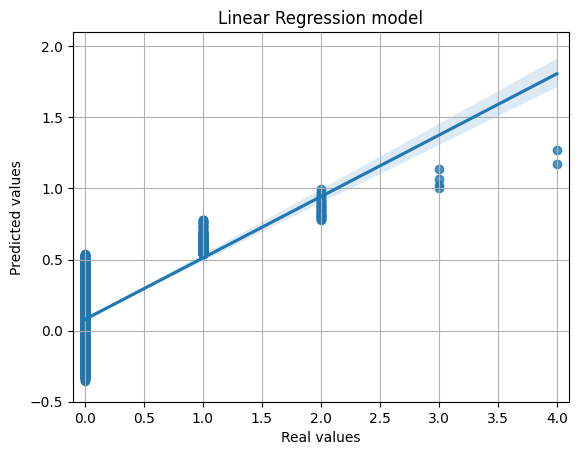

In [49]:
# FINAL LINEAR REGRESSION MODEL WITHOUT OBFUSCATION
# Training our model and generating our predictions
flr = FinalLinearRegression()
flr.fit(X_train, y_train)
df_preds = flr.predict(X_test)

# Printing our weights vector, RMSE, R2 score and squared R2 score values
print(flr.weights)
eval_regressor(y_test, df_preds)
    
# Plotting a regplot plot with our information
ax = sns.regplot(x=y_test, y=df_preds)
ax.set(xlabel="Real values",
ylabel="Predicted values",
title="Linear Regression model")
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.5, 2.1)
plt.grid()
plt.show()

Usamos nuestro modelo de regression lineal con la configuracion "con ofuscamiento".

[-0.94353902 -0.05791721 -0.01546567  0.09871889 -0.02397536]
RMSE: 0.34
R2: 0.43
Squared R2: 0.66


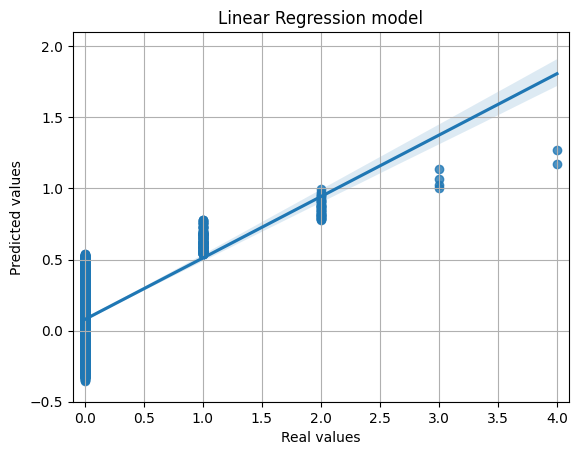

In [50]:
# FINAL LINEAR REGRESSION MODEL WITH OBFUSCATION
# Training our model and generating our predictions
flr = FinalLinearRegression()
flr.fit(X_train, y_train, True)
df_preds = flr.predict(X_test, True)

# Printing our weights vector, RMSE, R2 score and squared R2 score values
print(flr.weights)
eval_regressor(y_test, df_preds)
    
# Plotting a regplot plot with our information
ax = sns.regplot(x=y_test, y=df_preds)
ax.set(xlabel="Real values",
ylabel="Predicted values",
title="Linear Regression model")
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.5, 2.1)
plt.grid()
plt.show()

# Conclusiones

1.- El ofuscamiento de datos a traves de la multiplicacion matricial de una matrix $A$ con una matrix invertible $P$ no genera resultados dsitintos para el modelo de regresion lineal del algebra lineal. Esto se puede ver al comparar los bloques de codigo anteriores. 

2.- Debido a que los resultados obtenidos son iguales para los datos ofuscados y los no ofuscados, eso significa que los valores RMSE y $R^{2}$ obtenidos no cambiaran para ninguno de los casos. Los valores $RMSE = 0.34$ y $R^{2} = 0.43$ se conservan para ambos casos.